In [41]:
# 1. Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.model_selection import cross_val_score


In [2]:
# Column names for the WDBC dataset based on UCI repository documentation
columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Reload with correct column names
df = pd.read_csv('wdbc.csv', header=None, names=columns)

# Display first few rows
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:

# 3. EDA
# Handle missing values
df = df.dropna(thresh=df.shape[1] * 0.5)
df = df.fillna(df.median(numeric_only=True))

# Handle outliers using IQR (numeric columns)
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

In [4]:
# 4. Separate features and label
label_column = 'Diagnosis'

In [5]:
# Encode categorical target if necessary
if df[label_column].dtype == 'object':
    le = LabelEncoder()
    df[label_column] = le.fit_transform(df[label_column])

features = df.drop(label_column, axis=1)
labels = df[label_column]

In [6]:
# One-hot encode categorical features
features = pd.get_dummies(features, drop_first=True)

In [7]:
# 5. Feature scaling
scaler = StandardScaler()  # or MinMaxScaler(), Normalizer()
features_scaled = scaler.fit_transform(features)

In [8]:
# 6. Data splitting
X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
import time
start_time= time.time()
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
end_time = time.time()
training_time_dt = end_time - start_time
print(f"Training time for Decision Tree: {training_time_dt} seconds")

Training time for Decision Tree: 0.00899958610534668 seconds


[Text(0.5384615384615384, 0.9375, 'x[8] <= 0.082\ngini = 0.475\nsamples = 341\nvalue = [209, 132]'),
 Text(0.36538461538461536, 0.8125, 'x[24] <= 0.226\ngini = 0.102\nsamples = 205\nvalue = [194, 11]'),
 Text(0.2692307692307692, 0.6875, 'x[14] <= 0.271\ngini = 0.059\nsamples = 197\nvalue = [191, 6]'),
 Text(0.19230769230769232, 0.5625, 'x[25] <= 2.038\ngini = 0.031\nsamples = 191\nvalue = [188, 3]'),
 Text(0.15384615384615385, 0.4375, 'x[15] <= -1.481\ngini = 0.021\nsamples = 190\nvalue = [188, 2]'),
 Text(0.07692307692307693, 0.3125, 'x[2] <= 0.085\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.038461538461538464, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.11538461538461539, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.3125, 'x[22] <= 1.26\ngini = 0.011\nsamples = 185\nvalue = [184, 1]'),
 Text(0.19230769230769232, 0.1875, 'gini = 0.0\nsamples = 173\nvalue = [173, 0]'),
 Text(0.2692307692307692, 0.1875, 'x[25] <= 0.405\ngini =

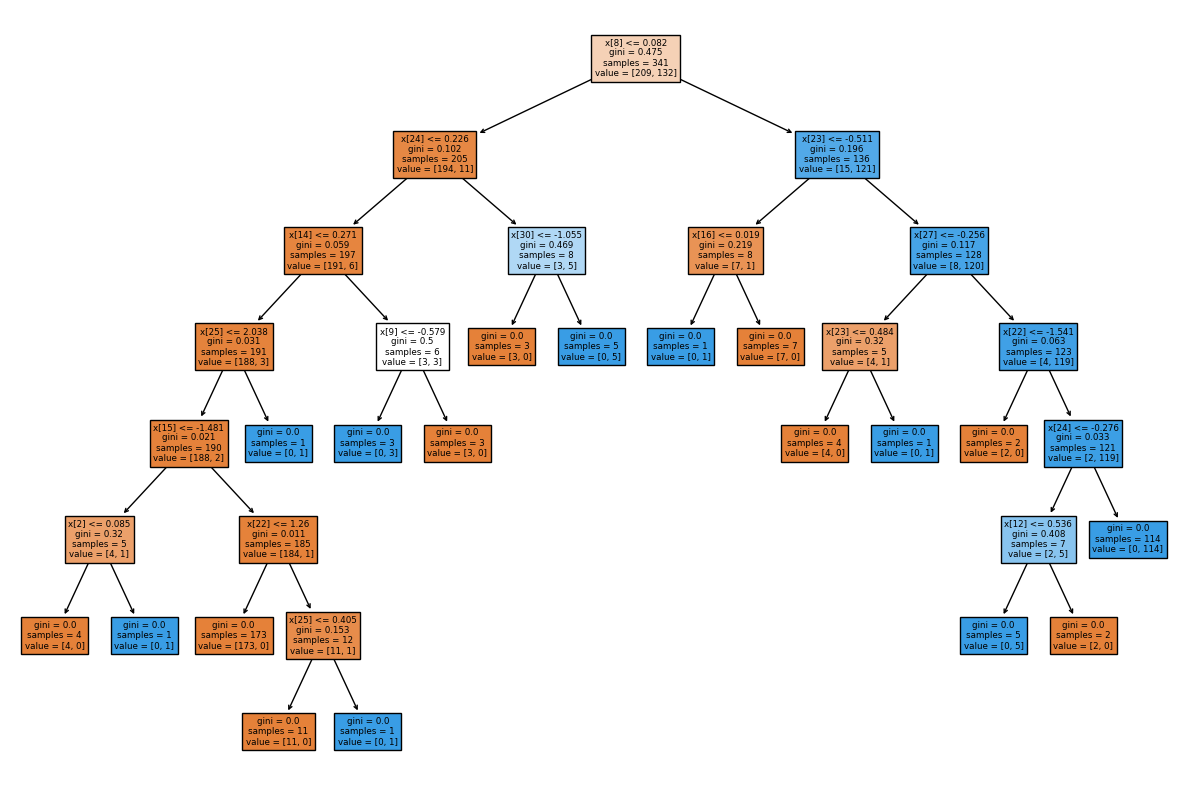

In [44]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model_dt,filled=True)

In [45]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_dt = GridSearchCV(
    estimator=model_dt,
    param_grid=param_grid,
    cv=cv,
    scoring={'accuracy': 'accuracy', 'f1': make_scorer(f1_score, average='weighted')},
    refit='accuracy',
    n_jobs=-1
)

start_time = time.time()
grid_search_dt.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Results
print(f"Best Parameters: {grid_search_dt.best_params_}")
print(f"Best CV Score: {grid_search_dt.best_score_:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV Score: 0.9501
Training Time: 3.9412 seconds


In [46]:
# Get cross-validation scores for accuracy
cv_scores = cross_val_score(grid_search_dt.best_estimator_, X_val, y_val, cv=cv, scoring='accuracy')

# Print fold-wise accuracy
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} Accuracy: {score:.4f}")

print(f"Average Accuracy: {np.mean(cv_scores):.4f}")

Fold 1 Accuracy: 0.9130
Fold 2 Accuracy: 0.9130
Fold 3 Accuracy: 0.8696
Fold 4 Accuracy: 0.9565
Fold 5 Accuracy: 1.0000
Average Accuracy: 0.9304


In [ ]:
# Extract results
results = pd.DataFrame(grid_search_dt.cv_results_)

# Select only the parameters and scores
table = results[[
    'param_criterion',
    'param_max_depth',
    'mean_test_accuracy',
    'mean_test_f1'
]].copy()

# Rename columns for LaTeX
table.rename(columns={
    'param_criterion': 'criterion',
    'param_max_depth': 'max_depth',
    'mean_test_accuracy': 'Accuracy',
    'mean_test_f1': 'F1 Score'
}, inplace=True)

# Round values
table['Accuracy'] = table['Accuracy'].round(4)
table['F1 Score'] = table['F1 Score'].round(4)

print(table.head(10))  # preview first 10 rows

# Export LaTeX table
latex_table = table.to_latex(index=False, caption="Decision Tree - Hyperparameter Tuning", label="tab:dt_hyperparam")
print(latex_table)

  criterion max_depth  Accuracy  F1 Score
0      gini      None    0.9149    0.9150
1      gini      None    0.9090    0.9080
2      gini      None    0.8972    0.8964
3      gini      None    0.9208    0.9202
4      gini      None    0.9032    0.9026
5      gini      None    0.9032    0.9022
6      gini      None    0.9004    0.8992
7      gini      None    0.8974    0.8964
8      gini      None    0.9004    0.8996
9      gini         5    0.9237    0.9233
\begin{table}
\caption{Decision Tree - Hyperparameter Tuning}
\label{tab:dt_hyperparam}
\begin{tabular}{llrr}
\toprule
criterion & max_depth & Accuracy & F1 Score \\
\midrule
gini & NaN & 0.914900 & 0.915000 \\
gini & NaN & 0.909000 & 0.908000 \\
gini & NaN & 0.897200 & 0.896400 \\
gini & NaN & 0.920800 & 0.920200 \\
gini & NaN & 0.903200 & 0.902600 \\
gini & NaN & 0.903200 & 0.902200 \\
gini & NaN & 0.900400 & 0.899200 \\
gini & NaN & 0.897400 & 0.896400 \\
gini & NaN & 0.900400 & 0.899600 \\
gini & 5 & 0.923700 & 0.923300 \\
gini 

In [60]:
model_dt = grid_search_dt.best_estimator_
y_pred_dt = model_dt.predict(X_test)

In [61]:
print("Decision Tree Classifier Metrics:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
cm= confusion_matrix(y_test, y_pred_dt)
print(f1_score(y_test, y_pred_dt, average='weighted'))

Decision Tree Classifier Metrics:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        76
           1       0.97      0.87      0.92        38

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315
0.9465811965811965


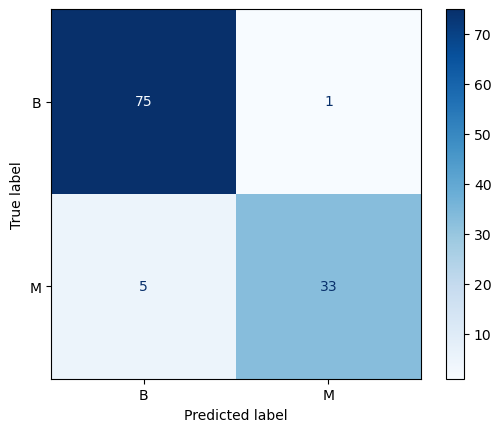

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
lbs = le.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lbs)
disp.plot(cmap='Blues')
plt.show()

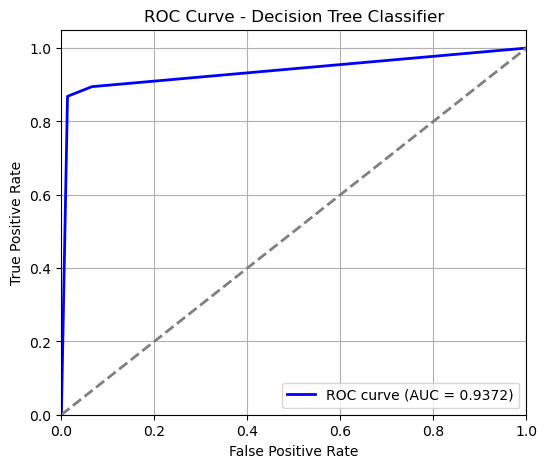

In [63]:
y_proba = model_dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## AdaBoost Classifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(random_state=42)
st = time.time()
model_ada.fit(X_train, y_train)
et = time.time()
training_time_ada = et - st
print(f"Training time for AdaBoost: {training_time_ada} seconds")

Training time for AdaBoost: 0.12019109725952148 seconds


In [48]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Run GridSearch with Accuracy & F1 scoring
grid_search_ada = GridSearchCV(
    estimator=model_ada,
    param_grid=param_grid,
    cv=cv,
    scoring={'accuracy': 'accuracy', 'f1': make_scorer(f1_score, average='weighted')},
    refit='accuracy',
    n_jobs=-1
)
# Measure training time
start_time = time.time()
grid_search_ada.fit(X_train, y_train)
end_time = time.time()

# Best parameters & score
print(f"Best Parameters: {grid_search_ada.best_params_}")
print(f"Best CV Score: {grid_search_ada.best_score_:.4f}")
print(f"Training Time: {end_time - start_time:.4f} seconds")

Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}
Best CV Score: 0.9736
Training Time: 4.2530 seconds


In [49]:
cv_scores = cross_val_score(grid_search_ada.best_estimator_, X_val, y_val, cv=cv, scoring='accuracy')

# Print fold-wise accuracy
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} Accuracy: {score:.4f}")

print(f"Average Accuracy: {np.mean(cv_scores):.4f}")


Fold 1 Accuracy: 0.8696
Fold 2 Accuracy: 1.0000
Fold 3 Accuracy: 0.8696
Fold 4 Accuracy: 0.9565
Fold 5 Accuracy: 0.9545
Average Accuracy: 0.9300


In [37]:
# Extract results
results = pd.DataFrame(grid_search_ada.cv_results_)

# Keep only useful columns
table = results[[
    'param_n_estimators',
    'param_learning_rate',
    'mean_test_accuracy',
    'mean_test_f1'
]].copy()

# Rename for readability
table.rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_learning_rate': 'learning_rate',
    'mean_test_accuracy': 'Accuracy',
    'mean_test_f1': 'F1 Score'
}, inplace=True)

# Round values
table['Accuracy'] = table['Accuracy'].round(4)
table['F1 Score'] = table['F1 Score'].round(4)



# Or only show top 5 by Accuracy
print("\nTop 5 results by Accuracy:\n")
print(table.sort_values(by="Accuracy", ascending=False).head(5))


Top 5 results by Accuracy:

   n_estimators learning_rate  Accuracy  F1 Score
38          200             1    0.9736    0.9734
39          300             1    0.9706    0.9703
35          300           0.5    0.9677    0.9673
34          200           0.5    0.9677    0.9673
19          300             1    0.9648    0.9646


In [65]:
model_ada = grid_search_ada.best_estimator_
y_pred_ada = model_ada.predict(X_test)

AdaBoost Classifier Metrics:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.93      1.00      0.96        38

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

Accuracy: 0.9736842105263158


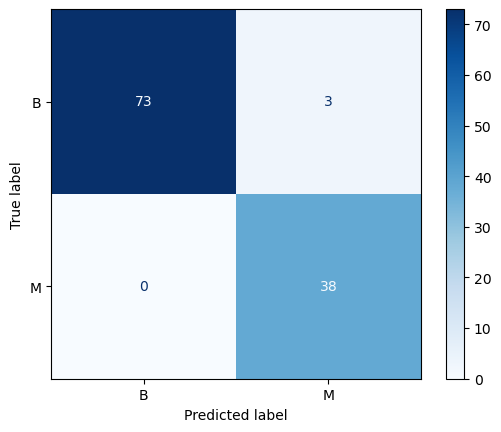

In [66]:
print("AdaBoost Classifier Metrics:")
print(classification_report(y_test, y_pred_ada))
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada)}")
cm= confusion_matrix(y_test, y_pred_ada)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lbs)
disp.plot(cmap='Blues')
plt.show()

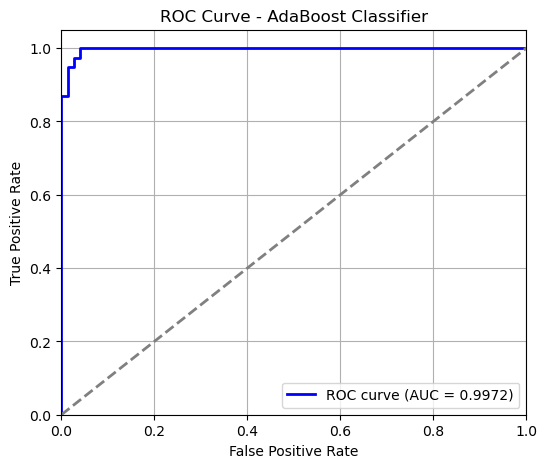

In [68]:
y_proba = model_ada.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
model_gradient = GradientBoostingClassifier(random_state=42)
st = time.time()
model_gradient.fit(X_train, y_train)
et = time.time()
training_time_gradient = et - st
print(f"Training time for Gradient Boosting: {training_time_gradient} seconds")

Training time for Gradient Boosting: 0.4329209327697754 seconds


In [52]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_grad = GridSearchCV(
    estimator=model_gradient,
    param_grid=param_grid,
    cv=cv,
    scoring={'accuracy': 'accuracy', 'f1': make_scorer(f1_score, average='weighted')},
    refit='accuracy',
    n_jobs=-1
)

# Measure training time
start_time = time.time()
grid_search_grad.fit(X_train, y_train)
end_time = time.time()

# Best parameters & score
print(f"Best Parameters: {grid_search_grad.best_params_}")
print(f"Best CV Score: {grid_search_grad.best_score_:.4f}")
print(f"Training Time: {end_time - start_time:.4f} seconds")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Best CV Score: 0.9736
Training Time: 99.8255 seconds


In [53]:
# Get cross-validation scores for accuracy
cv_scores = cross_val_score(grid_search_grad.best_estimator_, X_val, y_val, cv=cv, scoring='accuracy')

# Print fold-wise accuracy
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} Accuracy: {score:.4f}")

print(f"Average Accuracy: {np.mean(cv_scores):.4f}")

Fold 1 Accuracy: 0.9130
Fold 2 Accuracy: 0.9565
Fold 3 Accuracy: 0.9130
Fold 4 Accuracy: 1.0000
Fold 5 Accuracy: 0.9545
Average Accuracy: 0.9474


In [11]:
results = pd.DataFrame(grid_search_grad.cv_results_)

# Keep only relevant columns
table = results[[
    'param_n_estimators',
    'param_learning_rate',
    'param_max_depth',
    'mean_test_accuracy',
    'mean_test_f1'
]].copy()

# Rename columns
table.rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_learning_rate': 'learning_rate',
    'param_max_depth': 'max_depth',
    'mean_test_accuracy': 'Accuracy',
    'mean_test_f1': 'F1 Score'
}, inplace=True)

# Round values
table['Accuracy'] = table['Accuracy'].round(4)
table['F1 Score'] = table['F1 Score'].round(4)

# Sort by Accuracy and keep top 5
top5 = table.sort_values(by="Accuracy", ascending=False).head(5)

print("\n Gradient Boosting Results:\n")
print(top5)


 Gradient Boosting Results:

    n_estimators learning_rate max_depth  Accuracy  F1 Score
502          300           0.2         3    0.9736    0.9735
500          200           0.2         3    0.9736    0.9735
520          300           0.2         3    0.9736    0.9735
434          200           0.1         5    0.9736    0.9733
518          200           0.2         3    0.9736    0.9735


In [12]:
model_gradient = grid_search_grad.best_estimator_
y_pred_gradient = model_gradient.predict(X_test)

Gradient Boosting Classifier Metrics:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        76
           1       0.94      0.89      0.92        38

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315


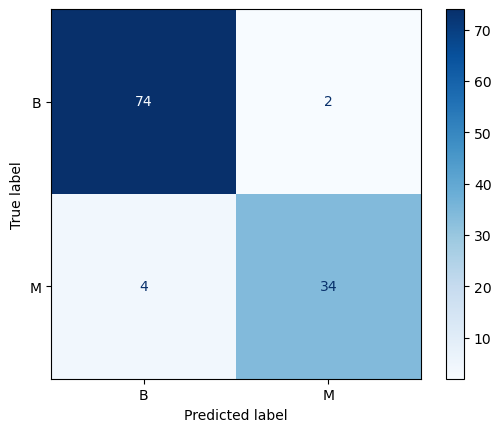

In [16]:
lbs = le.classes_
print("Gradient Boosting Classifier Metrics:")
print(classification_report(y_test, y_pred_gradient))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gradient)}")
cm = confusion_matrix(y_test, y_pred_gradient)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lbs)
disp.plot(cmap='Blues')
plt.show()

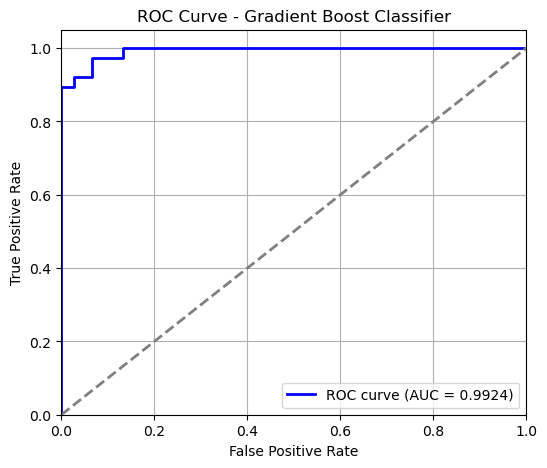

In [17]:
y_proba = model_gradient.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBoost Classifier

In [18]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [19]:
st = time.time()
model_xgb.fit(X_train, y_train)
et = time.time()
training_time_xgb = et - st
print(f"Training time for XGBoost: {training_time_xgb} seconds")

Training time for XGBoost: 1.8101122379302979 seconds


In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_xgb = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    cv=cv,
    scoring={'accuracy': 'accuracy', 'f1': make_scorer(f1_score, average='weighted')},
    refit='accuracy',
    n_jobs=-1
)
# Measure training time
start_time = time.time()
grid_search_xgb.fit(X_train, y_train)
end_time = time.time()

# Results
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Best CV Score: {grid_search_xgb.best_score_:.4f}")
print(f"Training Time: {end_time - start_time:.4f} seconds")

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}
Best CV Score: 0.9707
Training Time: 21.4219 seconds


In [54]:
# Get cross-validation scores for accuracy
cv_scores = cross_val_score(grid_search_xgb.best_estimator_, X_val, y_val, cv=cv, scoring='accuracy')

# Print fold-wise accuracy
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} Accuracy: {score:.4f}")

print(f"Average Accuracy: {np.mean(cv_scores):.4f}")

Fold 1 Accuracy: 0.9130
Fold 2 Accuracy: 0.9565
Fold 3 Accuracy: 0.8696
Fold 4 Accuracy: 1.0000
Fold 5 Accuracy: 1.0000
Average Accuracy: 0.9478


In [21]:
results = pd.DataFrame(grid_search_xgb.cv_results_)

# Keep only relevant columns
table = results[[
    'param_n_estimators',
    'param_learning_rate',
    'param_max_depth',
    'param_gamma',
    'mean_test_accuracy',
    'mean_test_f1'
]].copy()

# Rename columns
table.rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_learning_rate': 'learning_rate',
    'param_max_depth': 'max_depth',
    'param_gamma': 'gamma',
    'mean_test_accuracy': 'Accuracy',
    'mean_test_f1': 'F1 Score'
}, inplace=True)

# Round values
table['Accuracy'] = table['Accuracy'].round(4)
table['F1 Score'] = table['F1 Score'].round(4)

# Sort by Accuracy and keep top 5
top5 = table.sort_values(by="Accuracy", ascending=False).head(5)

print("\nTop 5 XGBoost Results:\n")
print(top5)


Top 5 XGBoost Results:

    n_estimators learning_rate max_depth gamma  Accuracy  F1 Score
81           200           0.2         4     0    0.9707    0.9705
180          100           0.2         5   0.1    0.9707    0.9705
542          200           0.1         5   0.1    0.9707    0.9706
83           300           0.2         4     0    0.9707    0.9705
548          200           0.1         6   0.1    0.9707    0.9706


In [22]:
model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = model_xgb.predict(X_test)

XGBoost Classifier Metrics:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        76
           1       0.92      0.95      0.94        38

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193
f1_score:  0.9562799231673403


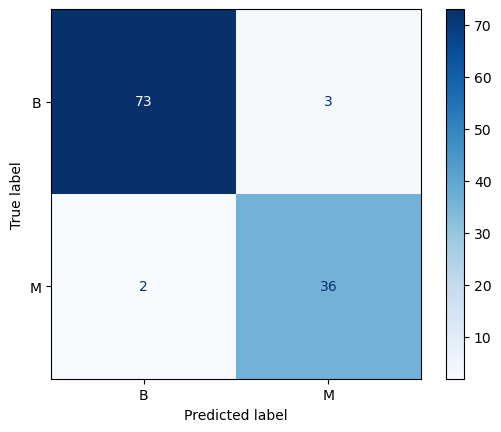

In [23]:
print("XGBoost Classifier Metrics:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print("f1_score: ",f1_score(y_test, y_pred_xgb, average='weighted'))
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lbs)
disp.plot(cmap='Blues')
plt.show()

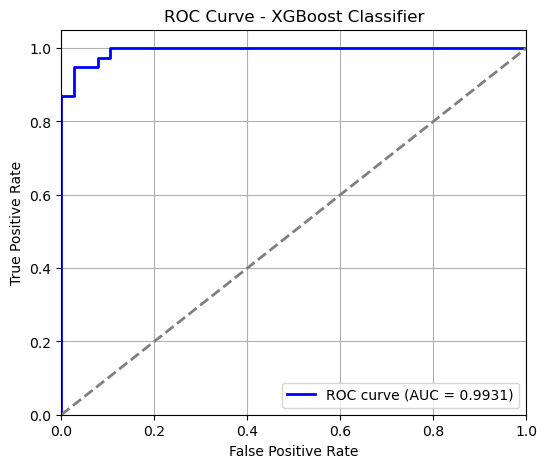

In [24]:
y_proba = model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
st = time.time()
model_rf.fit(X_train, y_train)
et = time.time()
training_time_rf = et - st
print(f"Training time for Random Forest: {training_time_rf} seconds")

Training time for Random Forest: 0.15265750885009766 seconds


In [57]:
# Random Forest: n estimators, max depth, criterion, max features, min samples split
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid,
    cv=cv,
    scoring={'accuracy': 'accuracy', 'f1': make_scorer(f1_score, average='weighted')},
    refit='accuracy',
    n_jobs=-1
)
# Measure training time
start_time = time.time()
grid_search_rf.fit(X_train, y_train)
end_time = time.time()

# Results
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best CV Score: {grid_search_rf.best_score_:.4f}")
print(f"Training Time: {end_time - start_time:.4f} seconds")

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.9559
Training Time: 11.8131 seconds


In [72]:
# Get cross-validation scores for accuracy
cv_scores = cross_val_score(grid_search_rf.best_estimator_, X_val, y_val, cv=cv, scoring='accuracy')

# Print fold-wise accuracy
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} Accuracy: {score:.4f}")

print(f"Average Accuracy: {np.mean(cv_scores):.4f}")

Fold 1 Accuracy: 0.9130
Fold 2 Accuracy: 0.9130
Fold 3 Accuracy: 0.9130
Fold 4 Accuracy: 1.0000
Fold 5 Accuracy: 1.0000
Average Accuracy: 0.9478


In [27]:
results = pd.DataFrame(grid_search_rf.cv_results_)

# Keep only relevant columns
table = results[[
    'param_n_estimators',
    'param_max_depth',
    'param_criterion',
    'mean_test_accuracy',
    'mean_test_f1'
]].copy()

# Rename columns
table.rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_max_depth': 'max_depth',
    'param_criterion': 'criterion',
    'mean_test_accuracy': 'Accuracy',
    'mean_test_f1': 'F1 Score'
}, inplace=True)

# Round values
table['Accuracy'] = table['Accuracy'].round(4)
table['F1 Score'] = table['F1 Score'].round(4)

# Sort by Accuracy and keep top 5
top5 = table.sort_values(by="Accuracy", ascending=False).head(5)

print("\nTop 5 Random Forest Results:\n")
print(top5)


Top 5 Random Forest Results:

    n_estimators max_depth criterion  Accuracy  F1 Score
172          200        20   entropy    0.9559    0.9556
148          200        15   entropy    0.9559    0.9556
166          200        20   entropy    0.9559    0.9556
154          200        15   entropy    0.9559    0.9556
100          200      None   entropy    0.9559    0.9556


In [28]:
model_rf = grid_search_rf.best_estimator_
y_pred_rf = model_rf.predict(X_test)

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        76
           1       1.00      0.92      0.96        38

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158


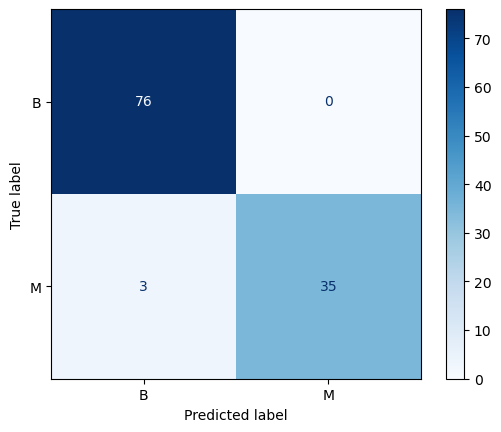

In [29]:
print("Random Forest Classifier Metrics:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lbs)
disp.plot(cmap='Blues')
plt.show()

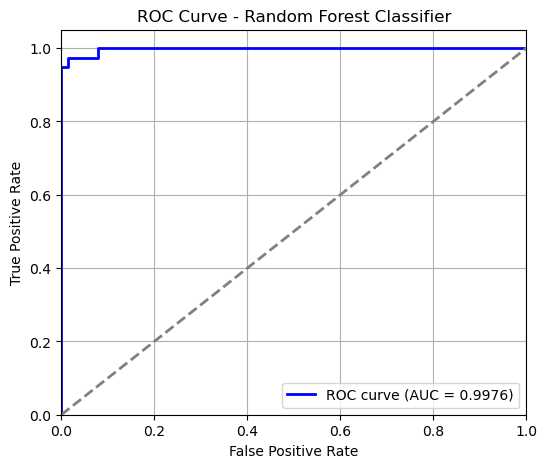

In [30]:
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Stacking Classifier (SVM + Naive Bayes + Decision Tree)

In [38]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# --------------------------
# DEFINE STACKED MODELS
# --------------------------

# 1) SVM, Naive Bayes, Decision Tree → Logistic Regression
model1 = StackingClassifier(
    estimators=[
        ("svm", make_pipeline(StandardScaler(), SVC(probability=True))),
        ("nb", GaussianNB()),
        ("dt", DecisionTreeClassifier(random_state=42))
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# 2) SVM, Naive Bayes, Decision Tree → Random Forest
model2 = StackingClassifier(
    estimators=[
        ("svm", make_pipeline(StandardScaler(), SVC(probability=True))),
        ("nb", GaussianNB()),
        ("dt", DecisionTreeClassifier(random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5,
    n_jobs=-1
)

# 3) SVM, Decision Tree, KNN → Logistic Regression
model3 = StackingClassifier(
    estimators=[
        ("svm", make_pipeline(StandardScaler(), SVC(probability=True))),
        ("dt", DecisionTreeClassifier(random_state=42)),
        ("knn", KNeighborsClassifier())
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

In [ ]:
param_grid1 = {
    "svm__svc__C": [0.1, 1, 10],
    "svm__svc__kernel": ["linear", "rbf"],
    "dt__max_depth": [None, 5, 10, 20],
    "dt__criterion": ["gini", "entropy", "log_loss"],
    "final_estimator__C": [0.1, 1, 10],
    "final_estimator__solver": ["lbfgs", "liblinear"]
}
param_grid2 = {
    "svm__svc__C": [0.1, 1, 10],
    "svm__svc__kernel": ["linear", "rbf"],
    "dt__max_depth": [None, 5, 10, 20],
    "dt__criterion": ["gini", "entropy", "log_loss"],
    "final_estimator__n_estimators": [100, 200, 300],
    "final_estimator__max_depth": [None, 10, 20],
    "final_estimator__min_samples_split": [2, 5, 10]
}
param_grid3 = {
    "svm__svc__C": [0.1, 1, 10],
    "svm__svc__kernel": ["linear", "rbf"],
    "dt__max_depth": [None, 5, 10, 20],
    "knn__n_neighbors": [3, 5, 7, 9],
    "knn__weights": ["uniform", "distance"],
    "final_estimator__C": [0.1, 1, 10],
    "final_estimator__solver": ["lbfgs", "liblinear"]
}
param_grids = [param_grid1, param_grid2, param_grid3]


=== SVM+NB+DT → LogisticRegression ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.97      0.97      0.97        38

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[75  1]
 [ 1 37]]

=== SVM+NB+DT → RandomForest ===
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.95      0.97      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[74  2]
 [ 1 37]]

=== SVM+DT+KNN → LogisticRegression ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.97      0.99   

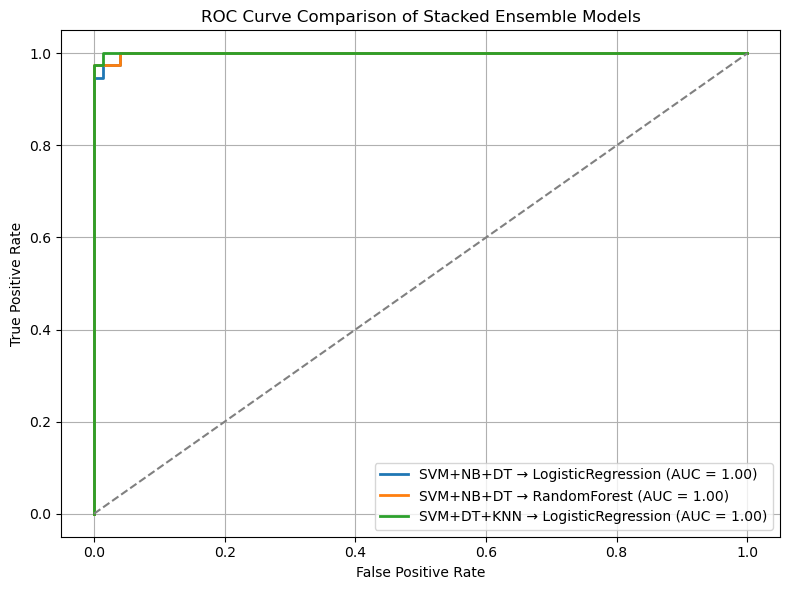


Final Comparison Table:

                             Model  Accuracy  F1 Score
0   SVM+NB+DT → LogisticRegression  0.982456  0.973684
1         SVM+NB+DT → RandomForest  0.973684  0.961039
2  SVM+DT+KNN → LogisticRegression  0.991228  0.986667


In [ ]:
# --------------------------
# TRAIN & EVALUATE MODELS
# --------------------------

models = {
    "SVM+NB+DT → LogisticRegression": model1,
    "SVM+NB+DT → RandomForest": model2,
    "SVM+DT+KNN → LogisticRegression": model3
}
results = []

plt.figure(figsize=(8, 6))
i=0
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    #hyperperparameter tuning

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search_stack = GridSearchCV(
        estimator=model,
        param_grid=param_grids[i],
        cv=cv,
        scoring={'accuracy': 'accuracy', 'f1': make_scorer(f1_score, average='weighted')},
        refit='accuracy',
        n_jobs=-1
    )
    grid_search_stack.fit(X_train, y_train)
    print(f"Best Parameters for {name}: {grid_search_stack.best_params_}")
    print(f"Best CV Score for {name}: {grid_search_stack.best_score_:.4f}")

    #k-fold cross validation
    cv_scores = cross_val_score(grid_search_stack.best_estimator_, X_val, y_val, cv=cv, scoring='accuracy')
    print(f"\nCross-Validation Scores for {name}:")
    for i, score in enumerate(cv_scores, 1):
        print(f"Fold {i} Accuracy: {score:.4f}")
    print(f"Average Accuracy: {np.mean(cv_scores):.4f}")

    i+=1

    model = grid_search_stack.best_estimator_
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC curve

    # Accuracy and F1
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

    # Reports
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --------------------------
# ROC PLOT
# --------------------------

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Stacked Ensemble Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------
# RESULTS TABLE
# --------------------------

results_df = pd.DataFrame(results)
print("\nFinal Comparison Table:\n")
print(results_df)